To accessing the dataset i'm importing files from google.colab

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Dataset.csv to Dataset.csv


**TASK-1 : DATA EXPLORATION AND PREPROCESSING**

importing the necessary libraries for level-1 task-1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Loading the dataset

In [ ]:
df = pd.read_csv('Dataset.csv')

identifying the number of rows and columns

In [ ]:
num_rows, num_columns = df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 9551
Number of columns: 21


checking for missing values in each column

In [ ]:
missing_values = df.isnull().sum()
print("Missing values:")
print(missing_values)

Missing values:
Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


checking the data types

In [ ]:
print("Data types:")
print(df.dtypes)

Data types:
Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object


Analyzing the distribution of the target variable ("Aggregate rating")

In [ ]:
target_counts = df['Aggregate rating'].value_counts()
print("Distribution of Aggregate rating:")
print(target_counts)

Distribution of Aggregate rating:
0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: Aggregate rating, dtype: int64


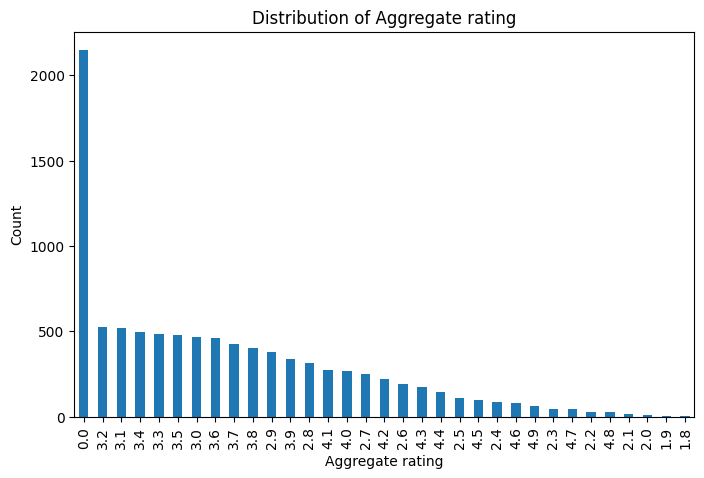

In [ ]:
plt.figure(figsize=(8, 5))
target_counts.plot(kind='bar')
plt.xlabel('Aggregate rating')
plt.ylabel('Count')
plt.title('Distribution of Aggregate rating')
plt.show()

if we observed above graph , target variable ("Aggregate rating") contains different classes . so, now we finding out the imbalanced classes by comparing  each percentage of particular class to all other classes,which classes have lower percentage of distribution tends to be imbalance classes or minority classes

In [ ]:
class_imbalances = {}

for class_value, count in target_counts.iteritems():
    percentage = (count / target_counts.sum()) * 100
    class_imbalances[class_value] = percentage

print("Class Imbalances:")
for class_value, imbalance in class_imbalances.items():
    print(f"Class '{class_value}': {imbalance:.2f}%")

Class Imbalances:
Class '0.0': 22.49%
Class '3.2': 5.47%
Class '3.1': 5.43%
Class '3.4': 5.21%
Class '3.3': 5.06%
Class '3.5': 5.03%
Class '3.0': 4.90%
Class '3.6': 4.80%
Class '3.7': 4.47%
Class '3.8': 4.19%
Class '2.9': 3.99%
Class '3.9': 3.51%
Class '2.8': 3.30%
Class '4.1': 2.87%
Class '4.0': 2.79%
Class '2.7': 2.62%
Class '4.2': 2.31%
Class '2.6': 2.00%
Class '4.3': 1.82%
Class '4.4': 1.51%
Class '2.5': 1.15%
Class '4.5': 0.99%
Class '2.4': 0.91%
Class '4.6': 0.82%
Class '4.9': 0.64%
Class '2.3': 0.49%
Class '4.7': 0.44%
Class '2.2': 0.28%
Class '4.8': 0.26%
Class '2.1': 0.16%
Class '2.0': 0.07%
Class '1.9': 0.02%
Class '1.8': 0.01%


<ipython-input-12-0c1ff199ccde>:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for class_value, count in target_counts.iteritems():


To handle imbalanced classes in a data set , i'm Using oversampling and undersampling techniques to balance the distribution of classes in the dataset.

In [ ]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Assuming 'target' is your continuous target variable

# Convert the continuous target variable into categorical labels using binning
num_bins = 3  # Number of bins or categories for classification
labels = [f'Class {i+1}' for i in range(num_bins)]  # Assign labels to each bin
df['target_category'] = pd.cut(df['Aggregate rating'], bins=num_bins, labels=labels)

# Separate the features and the updated target variable
X = df.drop('target_category', axis=1)
y = df['target_category']

# Resampling using Random Over-sampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Resampling using Random Under-sampling
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)


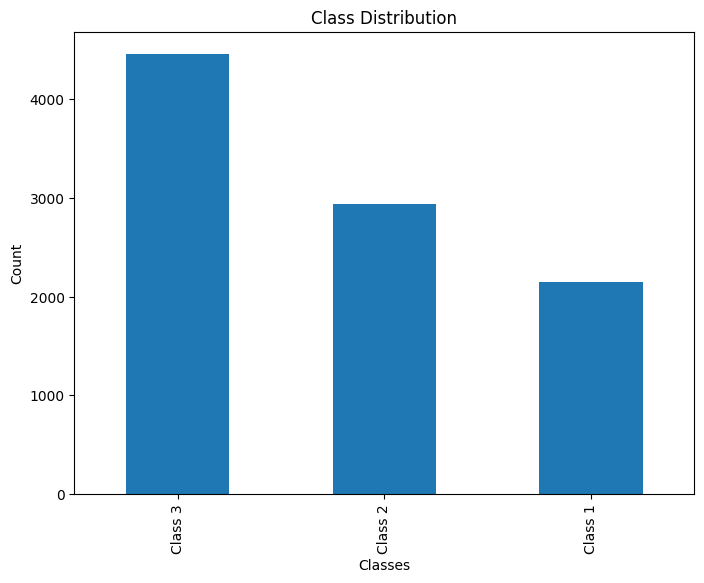

In [ ]:
class_counts = df['target_category'].value_counts()
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

**TASK-2 : DESCRIPTIVE ANALYSIS**




Calculating the  basic statistical measures (mean,
median, standard deviation, etc.) for numerical
columns.

In [ ]:
numerical_columns = df.select_dtypes(include='number')

In [ ]:
statistics = numerical_columns.describe()
print(statistics)

       Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.666370    156.909748  
std            16121.183073     0.905609          1.516378    430.169145  
min                0.000000     1.000000          0.000000      0.000000  
25%              250.000000     1.000000        

Exploring the distribution of categorical
variables like "Country Code,
" "City,
" and
"Cuisines.
"
Identify the top cuisines and cities with the
highest number of restaurants

In [ ]:
for column in df.select_dtypes(include='object'):
    value_counts = df[column].value_counts()
    print(f"\nDistribution of {column}:")
    print(value_counts)


Distribution of Restaurant Name:
Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
Odeon Social                 1
Johnny Rockets               1
House of Commons             1
HotMess                      1
Walter's Coffee Roastery     1
Name: Restaurant Name, Length: 7446, dtype: int64

Distribution of City:
New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan              1
Mayfield               1
Macedon                1
Vineland Station       1
Name: City, Length: 141, dtype: int64

Distribution of Address:
Dilli Haat, INA, New Delhi                                                               11
Sector 41, Noida                                                                         11
Greater Kailash (GK) 1, New D

In [ ]:
cuisine_counts = df['Cuisines'].value_counts()
top_cuisines = cuisine_counts.head(5)
city_counts = df['City'].value_counts()
top_cities = city_counts.head(5)

In [ ]:
print("\nTop 5 Cuisines:")
print(top_cuisines)


Top 5 Cuisines:
North Indian             936
North Indian, Chinese    511
Chinese                  354
Fast Food                354
North Indian, Mughlai    334
Name: Cuisines, dtype: int64


In [ ]:
print("\nCities with the Highest Number of Restaurants:")
print(top_cities)


Cities with the Highest Number of Restaurants:
New Delhi    5473
Gurgaon      1118
Noida        1080
Faridabad     251
Ghaziabad      25
Name: City, dtype: int64


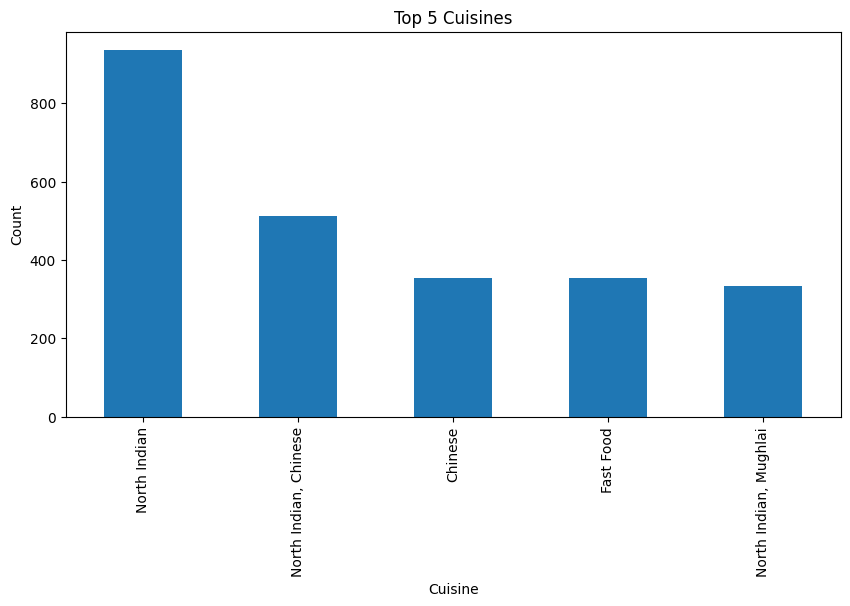

In [ ]:
plt.figure(figsize=(10, 5))
top_cuisines.plot(kind='bar')
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.title('Top 5 Cuisines')
plt.show()

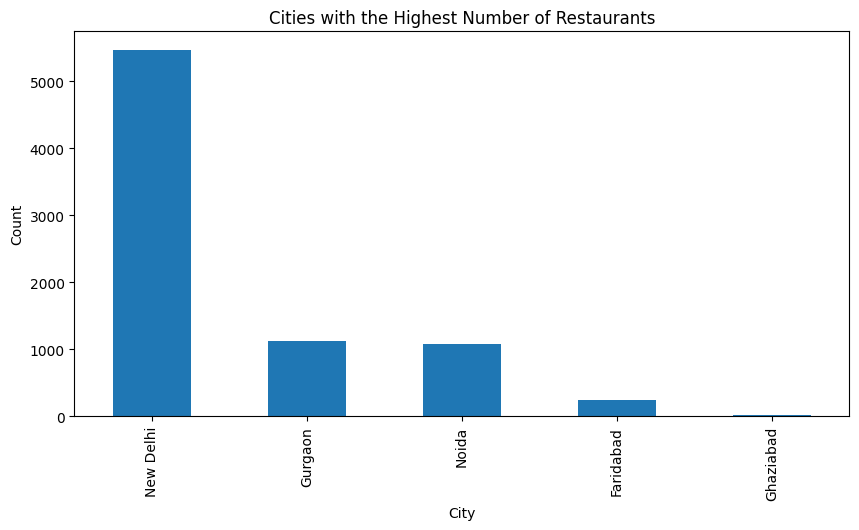

In [ ]:
plt.figure(figsize=(10, 5))
top_cities.plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Cities with the Highest Number of Restaurants')
plt.show()

**Task-3: Geospatial Analysis**

Visualize the locations of restaurants on a
map using latitude and longitude
information.  for that i'm starting with importing the necessary library to use maps  i.e. plotly.express

In [ ]:
import plotly.express as px

# Create a map centered around the average latitude and longitude
center_lat = df['Latitude'].mean()
center_long = df['Longitude'].mean()

fig = px.scatter_mapbox(df, lat='Latitude', lon='Longitude', hover_name='Restaurant Name', hover_data=['Cuisines'], center=dict(lat=center_lat, lon=center_long), zoom=12)

fig.update_layout(mapbox_style='open-street-map')
fig.show()


Analyze the distribution of restaurants
across different cities or countries.
Determine if there is any correlation
between the restaurant's location and its
rating.

In [ ]:
import seaborn as sns

In [ ]:
# Distribution of Restaurants across Cities
city_counts = df['City'].value_counts()
print("Distribution of Restaurants across Cities:")
print(city_counts)

Distribution of Restaurants across Cities:
New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan              1
Mayfield               1
Macedon                1
Vineland Station       1
Name: City, Length: 141, dtype: int64


In [ ]:
# Distribution of Restaurants across Countries
country_counts = df['Country Code'].value_counts()
print("\nDistribution of Restaurants across Countries:")
print(country_counts)


Distribution of Restaurants across Countries:
1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: Country Code, dtype: int64


In [ ]:
correlation_matrix = df[['Latitude', 'Longitude', 'Aggregate rating']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                  Latitude  Longitude  Aggregate rating
Latitude          1.000000   0.043207          0.000516
Longitude         0.043207   1.000000         -0.116818
Aggregate rating  0.000516  -0.116818          1.000000


 based on the correlation matrix, there is no meaningful correlation between the latitude of a restaurant and its aggregate rating. However, there is a weak negative correlation between the longitude of a restaurant and its aggregate rating, indicating that restaurants with higher longitude values may tend to have slightly lower ratings

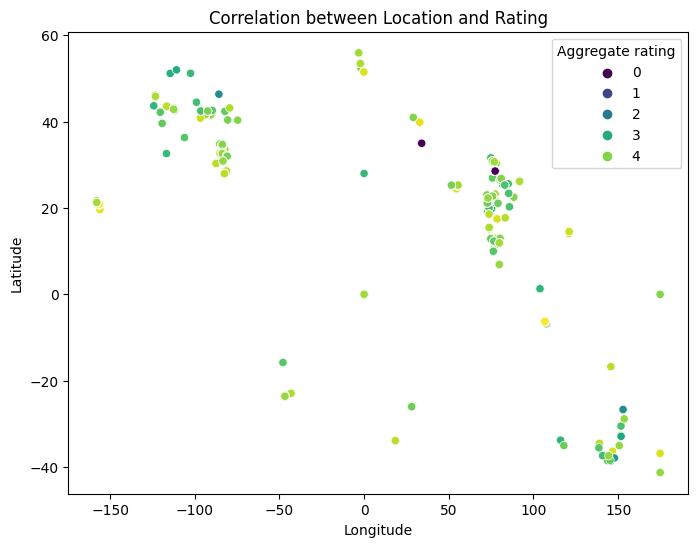

In [ ]:
# Visualize Correlation between Location and Rating
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Longitude', y='Latitude', hue='Aggregate rating', palette='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Correlation between Location and Rating')
plt.show()